# **Introduction**
        The "Heart Disease" dataset contains various health metrics from heart patients, including age, blood pressure, heart rate, and more. Our goal is to develop classification models capable of accurately identifying individuals with heart disease.
   

    

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import statistics
import math

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

# Upload the airline_satisfaction dataset
from google.colab import files
uploaded = files.upload()

Saving heart_disease.xlsx to heart_disease (5).xlsx


# **Read in the dataset into a Data Frame**


Column features explanation:
<div style="border-radius:10px; padding: 15px; background-color: #facfc8; font-size:120%; text-align:left">

<h2 align="left"><font color=red>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __age__ | Age of the patient in years |
| __sex__ | Gender of the patient (male, female) |
| __cp__ | Chest pain type: <br> 0: Typical angina <br> 1: Atypical angina <br> 2: Non-anginal pain <br> 3: Asymptomatic |
| __trestbps__ | Resting blood pressure in mm Hg |
| __chol__ | Serum cholesterol in mg/dl |                     
| __fbs__ | Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false) |
| __restecg__ | Resting electrocardiographic results: <br> 0: Normal <br> 1: Having ST-T wave abnormality <br> 2: Showing probable or definite left ventricular hypertrophy |  
| __thalach__ | Maximum heart rate achieved during a stress test |                      
| __exang__ | Exercise-induced angina (1 = yes, 0 = no) |
| __oldpeak__ | ST depression induced by exercise relative to rest |
| __slope__ | Slope of the peak exercise ST segment: <br> 0: Upsloping <br> 1: Flat <br> 2: Downsloping |                      
| __ca__ | Number of major vessels (0-4) colored by fluoroscopy |              
| __thal__ | Thalium stress test result: <br> 0: Normal <br> 1: Fixed defect <br> 2: Reversible defect <br> 3: Not described  |
| __target__ | Heart disease status (no disease, disease detected) |

---


**Questions:**
  1. What factors are highly correlated to heart disease?
  2. Can you classify heart disease status of the patients based on relevant features?
  3. Why did you choose these features?

In [ ]:
df = pd.read_excel('heart_disease.xlsx')
print('df shape: ', df.shape)
df.head()

df shape:  (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,disease detected
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,disease detected
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,disease detected
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,disease detected
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,disease detected


# **Exploring the Data and Data Processing**




*   Explore the distribution of each column
*   Fill in missing values or remove them (if applicable)
*   Remove outliers (if applicable)

In [ ]:
df.describe()
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Checking for missing values**

You can fill in missing values or you can remove the row with missing data.



In [ ]:
# If there is any missing values in each column, the boolean value next to the column name below will be True.
#df.isna().any()
df.dropna(inplace=True)




**Creating a Histogram for each numeric variable**

Pick one histogram and explain it in your presentation.

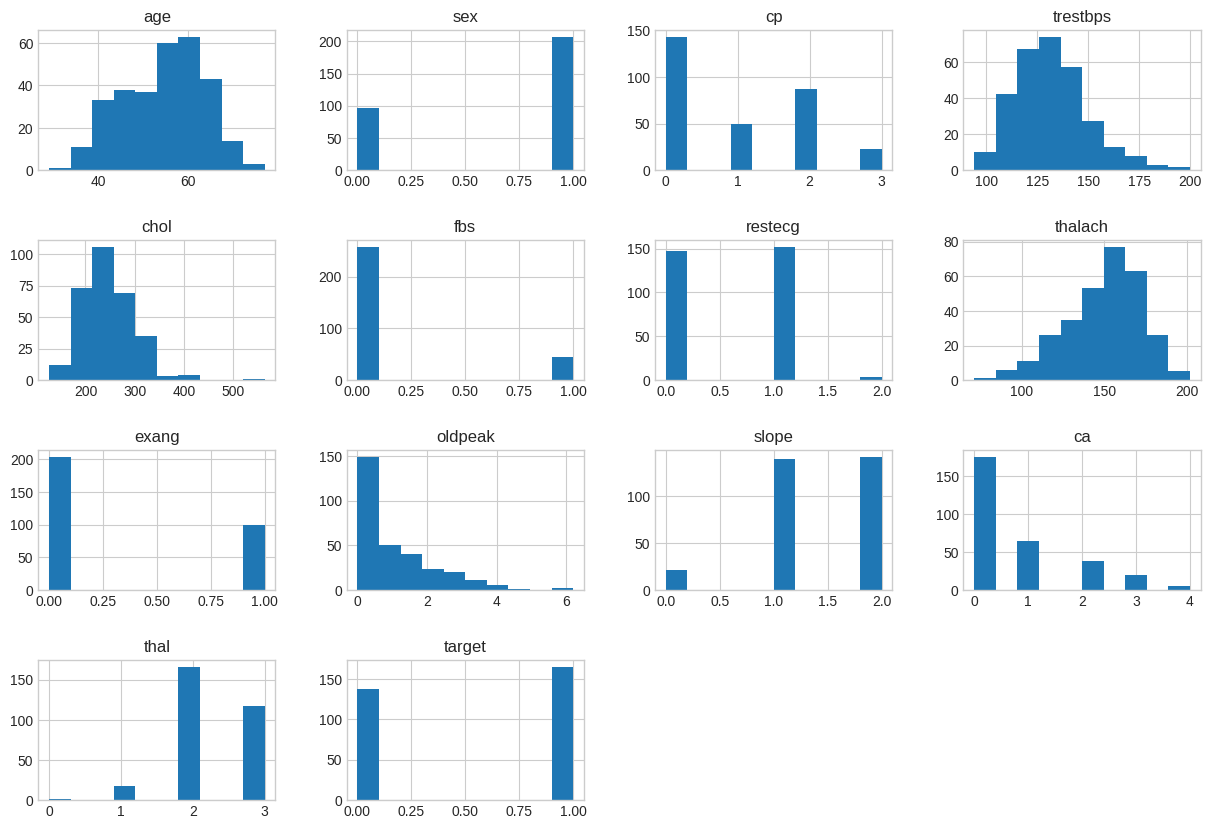

In [ ]:
# Enter your code below to create a histogram for each numeric variable
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
plt.show()

## **Encode categorical variables into numeric**

The following variable need to be encoded:
*     target (no disease --> 0, disease detected --> 1)
*     sex (male --> 0, female --> 1)

In [ ]:
# Check the values of "target"
print(df['target'].value_counts())

# Encode it into numeric
df['target'] = df['target'].map({'no disease': 0, 'disease detected': 1})

df['target'].value_counts()

target
disease detected    165
no disease          138
Name: count, dtype: int64


target
1    165
0    138
Name: count, dtype: int64

In [ ]:
# Encode the "sex" variable here
print(df['sex'].value_counts())
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64


Series([], Name: count, dtype: int64)

In [ ]:
df['sex']

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64

![](http://)<a id = "7"></a>
## **Find Correlations between all of the variables and "target**


The variables with the highest correlations are great candidates for classifying the "target" variable.



In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [ ]:
df.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
sex              NaN
Name: target, dtype: float64

In [ ]:
df_male = df[df['sex'] == 0]
df_male.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.522233
slope       0.458207
thalach     0.252103
restecg     0.032553
chol       -0.121769
age        -0.207531
fbs        -0.218218
trestbps   -0.391957
exang      -0.486509
ca         -0.487205
thal       -0.493197
oldpeak    -0.500454
sex              NaN
Name: target, dtype: float64

In [ ]:
df_female_fbs1 = df[(df['sex'] == 1) & (df['age'] > 50)]
df_female_fbs1.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.419621
thalach     0.376437
slope       0.214915
fbs         0.122748
restecg     0.121685
trestbps   -0.048239
thal       -0.153465
chol       -0.227784
age        -0.250189
exang      -0.336059
ca         -0.373527
oldpeak    -0.374093
sex              NaN
Name: target, dtype: float64

In [ ]:
df_female_fbs1 = df[(df['sex'] == 0) & (df['fbs'] == 1)]
df_female_fbs1.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.883541
slope       0.774597
age         0.232556
thalach     0.134045
chol        0.057117
restecg     0.000000
thal       -0.301511
exang      -0.507093
trestbps   -0.567873
ca         -0.676123
oldpeak    -0.677515
sex              NaN
fbs              NaN
Name: target, dtype: float64

**Visualize the correlations**

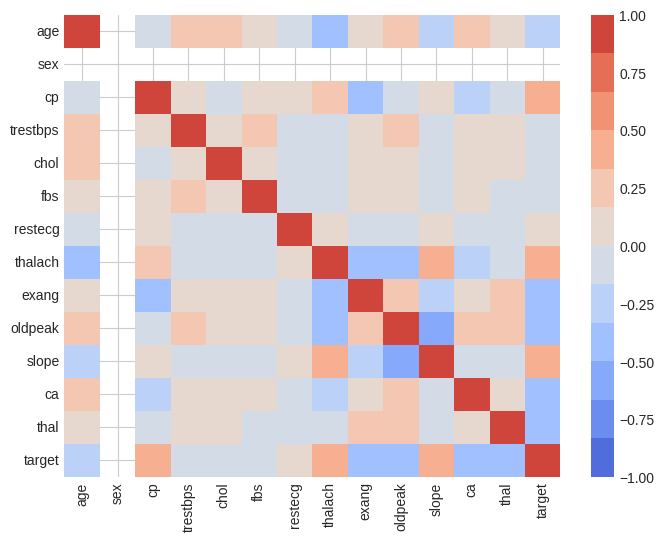

In [ ]:
corr = df.corr()
_, ax = plt.subplots(figsize=(8,6))

# graph correlation matrix
_ = sns.heatmap(corr, ax=ax,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                cmap=sns.color_palette("coolwarm", 12), vmin=-1, vmax=1)

**Create more visualizations to understand the variables you selected for model training**

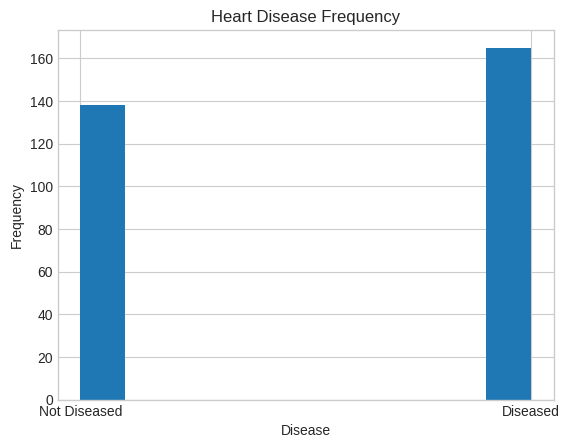

In [ ]:
df['target'].hist()
plt.title("Heart Disease Frequency")
plt.xlabel("Disease")
plt.ylabel("Frequency")
plt.xticks([0, 1], ['Not Diseased', 'Diseased'])
plt.show()


Create a scatterplot two variables that are most correlated with "target"

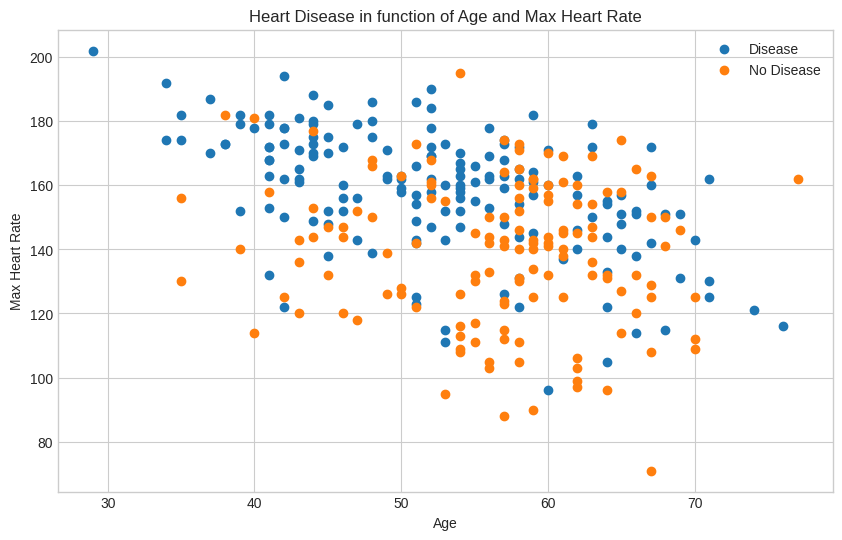

In [ ]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1])

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0])

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

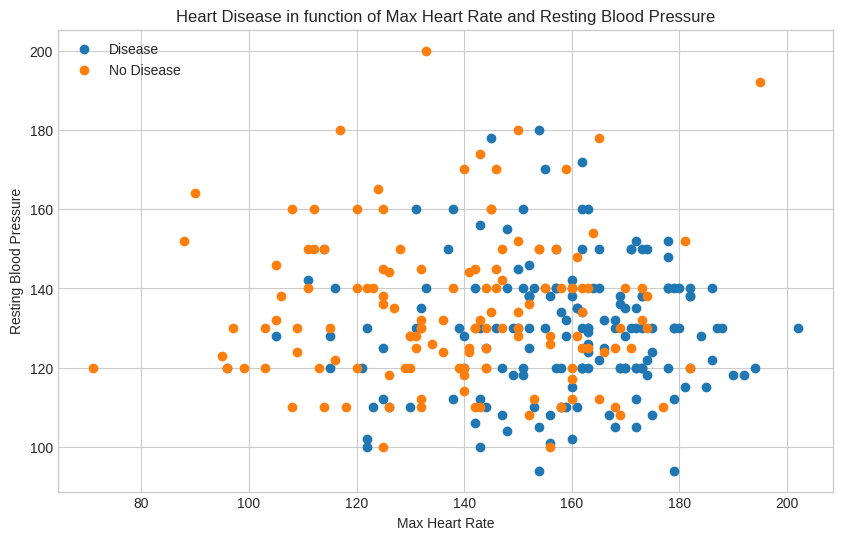

In [ ]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.thalach[df.target==1],
            df.trestbps[df.target==1])

# Scatter with negative examples
plt.scatter(df.thalach[df.target==0],
            df.trestbps[df.target==0])

plt.title("Heart Disease in function of Max Heart Rate and Resting Blood Pressure")
plt.xlabel("Max Heart Rate")
plt.ylabel("Resting Blood Pressure")
plt.legend(["Disease", "No Disease"]);
# Add some helpful info
#plt.title("Heart Disease in function of Age and Max Heart Rate")
#plt.xlabel("Age")
#plt.ylabel("Max Heart Rate")
#plt.legend(["Disease", "No Disease"]);

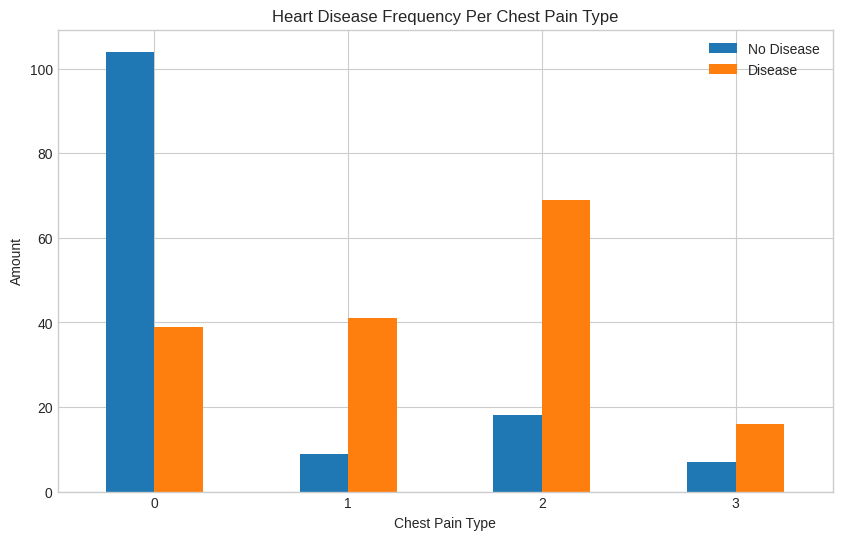

In [ ]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),)

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,NaN,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,NaN,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,NaN,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,NaN,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,NaN,0,120,354,0,1,163,1,0.6,2,0,2,1


# **Feature Selection**
The following features will be used to classify "target": ...

In [ ]:
data = df[[xxx]]
data.head()

#**Data Partition**

Splitting data into training set (70%) and testing set (30%).


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(df[['fbs', 'sex']], df['target'], test_size=0.3, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

((212, 2), (91, 2), (212,), (91,))

# **ML model development**

Create 2 ML models to classify customer satisfaction below.
Show the training and testing accuracy of each model.



## **Model #1**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(df[['thalach', 'cp','slope','age']], df['target'], test_size=0.3, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((212, 4), (91, 4), (212,), (91,))

In [ ]:
from sklearn.neural_network import MLPRegressor

# Create a neural network model with 3 layers: Layer 1 has 3 nodes, Layer 2 has 3 nodes, and Layer 3 has 2 nodes. 5 3 1 8
neural_network = MLPRegressor(solver='adam', alpha=1e-2, activation='logistic', hidden_layer_sizes=(5, 3, 1,8), \
                              random_state=11, early_stopping=True)

#Train the neural network model with training data
neural_network.fit(x_train, y_train)
# Predict the Spending Score for the training data and gets the R^2 score (best value is 1).
train_score = neural_network.score(x_train, y_train)
print('Training R^2: ', train_score)

# Predict the Spending Score for the training data and gets the R^2 score.
test_score = neural_network.score(x_test, y_test)
print('Testing R^2: ', test_score)

Training R^2:  -0.2130898709297957
Testing R^2:  -0.20083813012651697


In [ ]:
neural_network.predict(x_train)

array([0.77242768, 0.77242769, 0.77242768, 0.77242768, 0.77242768,
       0.77242768, 0.77242768, 0.77242768, 0.77242768, 0.77242768,
       0.77242768, 0.77242768, 0.77242768, 0.77242768, 0.77242768,
       0.77242768, 0.77242768, 0.77242768, 0.77242768, 0.77242768,
       0.77242768, 0.77242768, 0.77242768, 0.77242768, 0.77242768,
       0.77242768, 0.77242768, 0.77242768, 0.77242768, 0.77242768,
       0.77242768, 0.77242768, 0.77242768, 0.77242766, 0.77242768,
       0.77242768, 0.77242768, 0.77242768, 0.77242768, 0.77242768,
       0.77242768, 0.77242768, 0.77242768, 0.77242768, 0.77242768,
       0.77242768, 0.77242768, 0.77242768, 0.77242768, 0.77242766,
       0.77242768, 0.77242768, 0.77242768, 0.77242768, 0.77242768,
       0.77242768, 0.77242768, 0.77242768, 0.77242765, 0.77242768,
       0.77242768, 0.77242768, 0.77242768, 0.77242768, 0.77242768,
       0.77242768, 0.77242768, 0.77242768, 0.77242768, 0.77242768,
       0.77242768, 0.77242768, 0.77242768, 0.77242768, 0.77242

## **Model #2**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']
x_train, x_test, y_train, y_test = train_test_split(df[['trestbps', 'cp','fbs','chol']], df['target'], test_size=0.3, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((212, 4), (91, 4), (212,), (91,))

In [ ]:
from sklearn.neural_network import MLPRegressor

# Create a neural network model with 3 layers: Layer 1 has 3 nodes, Layer 2 has 3 nodes, and Layer 3 has 2 nodes. 4 , 3, 1
neural_network = MLPRegressor(solver='adam', alpha=1e-2, activation='logistic', hidden_layer_sizes=(5,3, 4,2), \
                              random_state=11, early_stopping=True)

#Train the neural network model with training data
neural_network.fit(x_train, y_train)
# Predict the Spending Score for the training data and gets the R^2 score (best value is 1).
train_score = neural_network.score(x_train, y_train)
print('Training R^2: ', train_score)

# Predict the Spending Score for the training data and gets the R^2 score.
test_score = neural_network.score(x_test, y_test)
print('Testing R^2: ', test_score)

Training R^2:  -0.11721275476085147
Testing R^2:  -0.10789539868300069


In [ ]:
neural_network.predict(x_train)

array([0.71288723, 0.712866  , 0.71286594, 0.71286585, 0.71299598,
       0.71286619, 0.71289228, 0.71286596, 0.71338214, 0.71286596,
       0.71364236, 0.71286603, 0.71363974, 0.71307242, 0.71286587,
       0.71286808, 0.71286586, 0.7128672 , 0.7128672 , 0.71286592,
       0.71293333, 0.71288147, 0.71286585, 0.71357263, 0.71364326,
       0.71287022, 0.71286608, 0.71305027, 0.71364354, 0.7128659 ,
       0.71289036, 0.71364406, 0.71286643, 0.71340359, 0.71288204,
       0.71286645, 0.71286618, 0.71286585, 0.71286587, 0.71291254,
       0.71286584, 0.71290481, 0.71286586, 0.71334245, 0.71289173,
       0.71309196, 0.71286614, 0.71296868, 0.71344042, 0.71286584,
       0.71363075, 0.71353342, 0.712866  , 0.71286591, 0.71286589,
       0.71286602, 0.71300185, 0.71359828, 0.7129558 , 0.71286585,
       0.71286588, 0.71286695, 0.71286598, 0.71286592, 0.71286585,
       0.71286607, 0.7128663 , 0.71288075, 0.71291236, 0.71286593,
       0.71288614, 0.71286591, 0.71364423, 0.71286593, 0.71286